In [20]:
%pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [dotenv]
Note: you may need to restart the kernel to use updated packages.


## 1. Import Dependancies

In [21]:
from enum import Enum
import pandas as pd
import openai, groq
import numpy as np
import seaborn as sns
from pydantic import BaseModel
from dotenv import load_dotenv

load_dotenv()

True

## 2. Basic Information

In [3]:
df = pd.read_csv('./raw/CEHHbInToW.csv')

In [ ]:
# Number of null values in each column
df.isnull().sum()

RowNumber            0
CustomerId           0
Firstname            7
Lastname             6
CreditScore          0
Geography            0
Gender             108
Age                600
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

## 3. Handle Missing Values

### 3.1 Deletion

axis = 1 -> check each column and drop if atleast 1 null value consists of <br>
axis = 0 -> check each row and drop if atleast 1 null value consists of


In [ ]:
df_cp = df.copy()
df_cp = df_cp.dropna(axis=0)

''

### 3.2 Inputation

#### 3.2.1 Age

In [9]:
mean = df['Age'].mean()
median = df['Age'].median()
mean = round(mean, 2)

print(f'Mean Age: {mean}, Median Age: {median}')

Mean Age: 38.91, Median Age: 37.0


<Axes: xlabel='Age', ylabel='Count'>

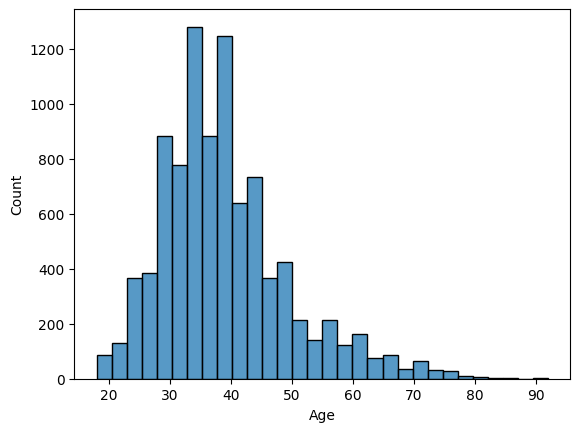

In [11]:
sns.histplot(df['Age'], bins=30)

In [14]:
df_impute = df.copy()

In [16]:
# Fill missing values in 'Age' with the mean
df_impute.loc[:,'Age'] = df_impute['Age'].fillna(mean)
df_impute.isnull().sum()

RowNumber            0
CustomerId           0
Firstname            7
Lastname             6
CreditScore          0
Geography            0
Gender             108
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

#### 3.2.2 Gender

In [22]:
class Gender(str, Enum):
    MALE = "Male"
    FEMALE = "Female"

class GenderPrediction(BaseModel):
    firstname: str
    lastname: str
    pred_gender: Gender

def predict_gender(firstname: str, lastname: str):
    prompt = f"""
                What is the most likely gender (Male or Female) for someone with the first name '{firstname}'
                and last name '{lastname}' ?

                Your response only consists of one word: Male or Female
            """
    
    response = groq.Groq().chat.completions.create(
        model="llama-3.3-70b-versatile",
        messages=[{
            "role": "user",
            "content": prompt
        }]
    )

    predict_gender = response.choices[0].message.content.strip()
    return predict_gender

In [36]:
missing_gender_index = df_impute['Gender'].isnull()
for idx in df_impute[missing_gender_index].index:
    first_name = df_impute.loc[idx, 'Firstname']
    last_name = df_impute.loc[idx, 'Lastname']
    gender = predict_gender(first_name, last_name)
    if gender:
        df_impute.loc[idx, 'Gender'] = gender
        print(f"{first_name} {last_name} : {gender}")
    else:
        print(f"{first_name} {last_name} : No Gender Detected")

Eva Wilson : Female
Ivy Johnson : Female
David Taylor : Male
Frank Davis : Male
Jack Wilson : Male
David Miller : Male
Eva Taylor : Female
Grace Johnson : Female
Hank Miller : Male
Frank Williams : Male
Alice Davis : Female
Alice Brown : Female
Alice Garcia : Female
Bob Jones : Male
Jack Davis : Male
Grace Williams : Female
Ivy Jones : Female
David Smith : Male
David Miller : Male
Eva Williams : Female
Frank Garcia : Male
Alice Wilson : Female
Carol Jones : Female
Hank Davis : Male
Ivy Williams : Female
Hank Smith : Male
Ivy Jones : Female
Alice Brown : Female
Eva Taylor : Female
Carol Williams : Female
Jack Williams : Male
Ivy Brown : Female
David Brown : Male
Bob Smith : Male
Frank Wilson : Male
Bob Williams : Male
Ivy Johnson : Female
Jack Taylor : Male
David Davis : Male
David Garcia : Male
Eva Brown : Female
Frank Wilson : Male
Jack Davis : Male
Eva Miller : Female
Grace Williams : Female
Bob Jones : Male
David Taylor : Male
Frank Smith : Male
Ivy Jones : Female
David Williams : M

In [ ]:
df_impute = df_impute.drop(
    columns=[
        'RowNumber',
        'CustomerId',
        'Firstname',
        'Lastname'
    ]
)

KeyError: "['RowNumber', 'CustomerId', 'Firstname', 'Lastname'] not found in axis"

In [40]:
df_impute.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [41]:
df_impute.to_csv('processed/ChurnModelling_Missing_Values_Handled.csv', index=False)